# Introduction to `Scikit-learn`

The `scikit-learn` package is an open-source library that provides a robust set of machine learning algorithms for Python. It is built upon the core Python scientific stack (*i.e.* NumPy, SciPy, Cython), and has a simple, consistent API, making it useful for a wide range of statistical learning applications.

![scikit-learn algorithms](http://1.bp.blogspot.com/-ME24ePzpzIM/UQLWTwurfXI/AAAAAAAAANw/W3EETIroA80/s1600/drop_shadows_background.png)

## What is Machine Learning?

Machine Learning (ML) is about coding programs that automatically adjust their performance from exposure to information encoded in data. This learning is achieved via **tunable parameters** that are automatically adjusted according to performance criteria.

Machine Learning can be considered a subfield of Artificial Intelligence (AI).

There are three major classes of ML:

**Supervised learning**
: Algorithms which learn from a training set of *labeled* examples (exemplars) to generalize to the set of all possible inputs. Examples of supervised learning include regression and support vector machines.

**Unsupervised learning**
: Algorithms which learn from a training set of *unlableled* examples, using the features of the inputs to categorize inputs together according to some statistical criteria. Examples of unsupervised learning include k-means clustering and kernel density estimation.

**Reinforcement learning**
: Algorithms that learn via reinforcement from a *critic* that provides information on the quality of a solution, but not on how to improve it. Improved solutions are achieved by iteratively exploring the solution space. We will not cover RL in this course.

## Representing Data in `scikit-learn`

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

# Example: Iris morphometrics

One of the datasets included with `scikit-learn` is a set of measurements for flowers, each being a member of one of three species: *Iris Setosa*, *Iris Versicolor* or *Iris Virginica*. 

![iris](http://w3.uniroma1.it/chemo/image/iris-flower.jpg)

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

%pylab inline
iris = load_iris??

Populating the interactive namespace from numpy and matplotlib


In [6]:
iris = load_iris()

In [7]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [8]:
n_samples, n_features = iris.data.shape
n_samples, n_features

(150, 4)

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

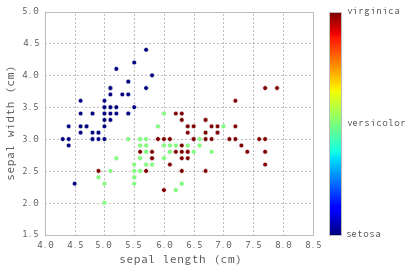

In [13]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

In [48]:
iris_X = iris.data
iris_y = iris.target

import pandas as pd

aa = pd.DataFrame([1,2,3])

aa.as_matrix()

np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

print knn.fit(iris_X_train, iris_y_train).score(iris_X_test, iris_y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
          n_neighbors=5, p=2, weights='uniform')

print knn.predict(iris_X_test)

print iris_y_test


0.9
[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


## `scikit-learn` interface

All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: an **estimator** interface for building and ﬁtting models, a **predictor** interface for making predictions and a **transformer** interface for converting data.

The estimator interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a fit method for learning a model from training data. All supervised and unsupervised learning algorithms (*e.g.*, for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.

Scikit-learn strives to have a uniform interface across all methods; given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.
    
The *predictor* interface extends the notion of an estimator by adding a `predict` method that takes an array `X_test` and produces predictions based on the learned parameters of the estimator. In the case of supervised learning estimators, this method typically returns the predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as k-means, where the predicted values are the cluster labels.

Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a *transformer* interface which deﬁnes a transform method. It takes as input some new data `X_test` and yields as output a transformed version. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as transformers within the library.

###First, a bit about scikit-learn

The structure of scikit-learn:

Some of the following text is taken from the scikit-learn API paper: http://arxiv.org/pdf/1309.0238v1.pdf

>All objects within scikit-learn share a uniform common basic API consisting of
three complementary interfaces: an estimator interface for building and ﬁtting
models, a predictor interface for making predictions and a transformer interface
for converting data.

>The estimator interface is at the core of the library. It deﬁnes instantiation
mechanisms of objects and exposes a ***fit*** method for learning a model from
training data. All supervised and unsupervised learning algorithms (e.g., for
classiﬁcation, regression or clustering) are oﬀered as objects implementing this
interface. Machine learning tasks like feature extraction, feature selection or
dimensionality reduction are also provided as estimators.



An example along these lines:

    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    
If one changes classifiers, say, to a Random Forest classifier, one would simply replace `LogisticRegression()` in the snippet above by `RandomForestClassifier()`.

>The **predictor** interface extends the notion of an estimator by adding a predict
method that takes an array `X_test` and produces predictions for `X_test`, based on
the learned parameters of the estimator. In the case of
supervised learning estimators, this method typically returns the predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as k-means, where the predicted values are the cluster labels.

    clf.predict(X_test)

>Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a **transformer** interface which deﬁnes a transform method. It takes as input some new data `X_test` and yields
as output a transformed version of `X_test`. Preprocessing, feature selection,
feature extraction and dimensionality reduction algorithms are all provided as
transformers within the library.

This is usually done via the `fit_transform` method. For example, to do a PCA:

    pca = RandomizedPCA(n_components=2)
    train_x = pca.fit_transform(train_x)
    test_x = pca.transform(test_x)
    
The training set here is "fit" to find the PC components, and then then transformed. Since `pca.fit()` by itself changes the `pca` object, if we want to transform other data using the same transformation we simply call `transform` subsequently.

Finally, for now, there is the concept of a meta-estimator, which behaves quite similarly to standard estimators, but allows us to wrap, for example, cross-validation, or methods that build and combine simpler models or schemes. For example:

    from sklearn.multiclass import OneVsOneClassifier
    clf=OneVsOneClassifier(LogisticRegression())

>In scikit-learn, model selection is supported in two distinct meta-estimators,
GridSearchCV and RandomizedSearchCV. They take as input an estimator (basic
or composite), whose hyper-parameters must be optimized, and a set of hyperparameter settings to search through.


>Most machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be [n_samples, n_features]

## Overfitting... a reason to regularize

Model selection and validation are fundamental steps in statistical learning applications. In particular, we wish to select the model that performs optimally, both wish respect to the training data and to external data. 

Depending on the type of learning method we use, we may be interested in one or more of the following:

* how many variables should be included in the model?
* what hyperparameter values should be used in fitting the model?
* how many groups should be use to cluster our data?

![overfit](http://www.willamette.edu/~gorr/classes/cs449/figs/overfit.gif)

In [15]:
%pylab inline

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

cars = pd.read_csv("data/cars_scrubbed.csv")

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


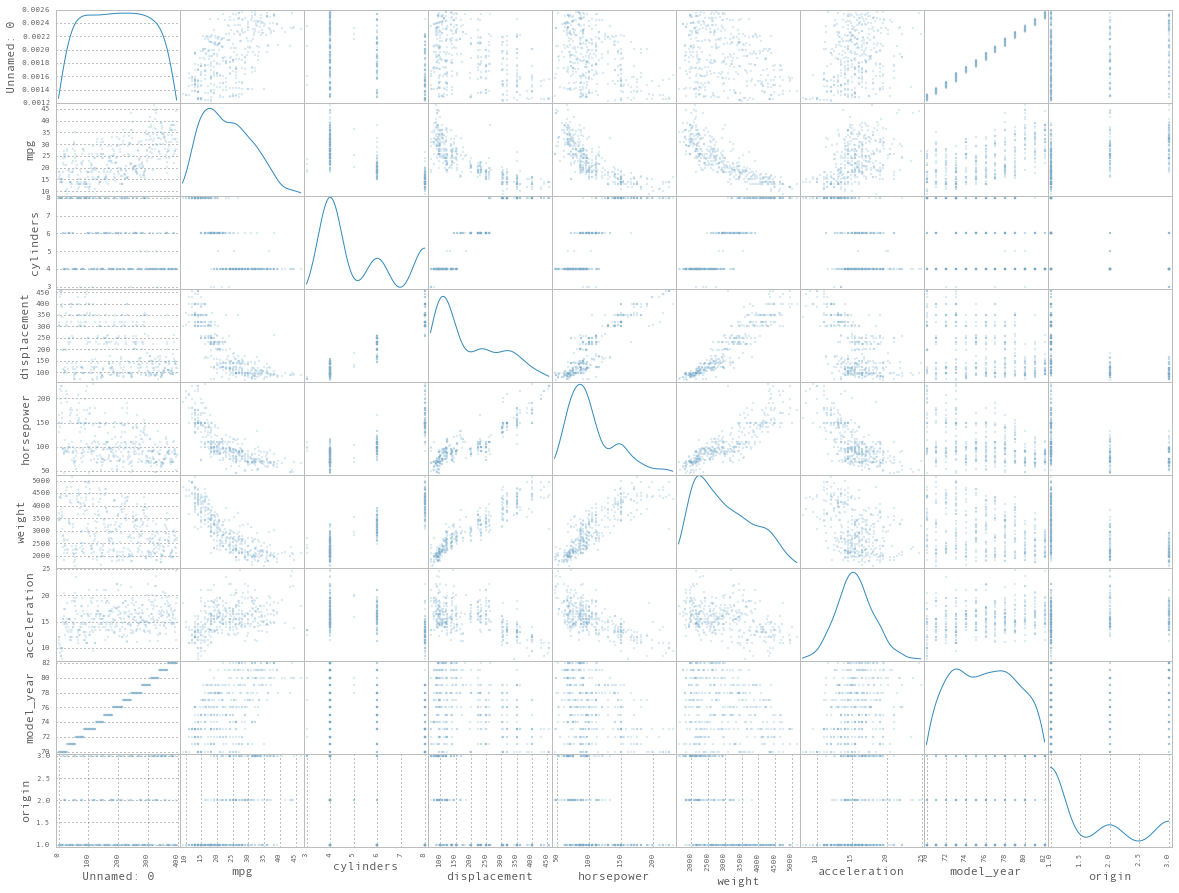

In [16]:
pd.scatter_matrix(cars, figsize=(20,15), alpha=0.2, diagonal='kde');

In [17]:
horses = cars['horsepower']
mpg = cars['mpg']
displacement = cars['displacement']

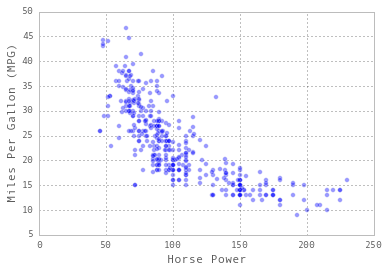

In [18]:
plt.scatter(x=horses, y=mpg, alpha=0.4)
plt.xlabel("Horse Power")
plt.ylabel("Miles Per Gallon (MPG)")
plt.savefig("data_scatter.png", dpi=100)

One the one extreme, a linear relationship is underfit; at the other, we see that including a very large number of polynomial terms is clearly overfitting the data.

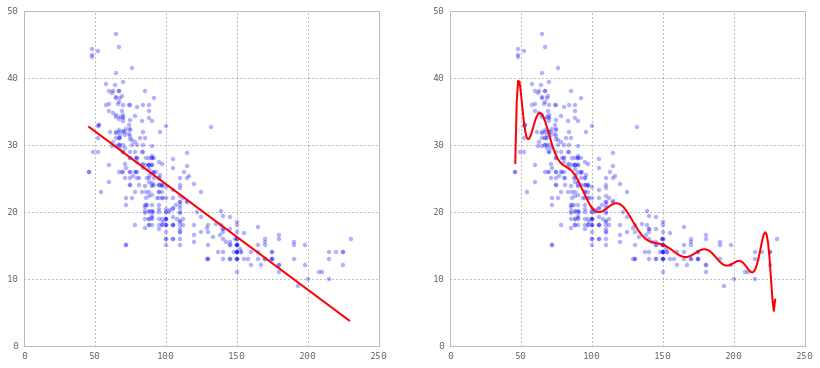

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

xvals = np.arange(horses.min(), horses.max())

fit1 = np.polyfit(horses, mpg, 1)
p1 = np.poly1d(fit1)
axes[0].plot(xvals, p1(xvals), color="red", linewidth=2)
axes[0].scatter(x=horses, y=mpg, alpha=0.3)

fit15 = np.polyfit(horses, mpg, 20)
p15 = np.poly1d(fit15)
axes[1].plot(xvals, p15(xvals), color="red", linewidth=2)
axes[1].scatter(x=horses, y=mpg, alpha=0.3)

In [62]:
p15.coeffs

array([  1.03346835e-36,  -1.83680181e-33,   1.37665974e-30,
        -5.36028668e-28,   9.54956957e-26,   4.69797682e-24,
        -5.31851646e-21,   5.37322046e-19,   1.89905743e-16,
        -5.64377999e-14,   3.17644435e-13,   2.84993831e-09,
        -7.88352705e-07,   1.22367094e-04,  -1.28238234e-02,
         9.54261588e-01,  -5.08138881e+01,   1.89960379e+03,
        -4.74275399e+04,   7.10455230e+05,  -4.82797716e+06])

In [63]:
p1.coeffs

array([ -0.15784473,  39.93586102])

We can select an appropriate polynomial order for the model using **cross-validation**, in which we hold out a testing subset from our dataset, fit the model to the remaining data, and evaluate its performance on the held-out subset.

In [64]:
from sklearn.cross_validation import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(horses, mpg, test_size=0.25)

A natural criterion to evaluate model performance is root mean square error.

In [65]:
def rmse(x, y, coefs):
    yfit = np.polyval(coefs, x)
    return np.sqrt(np.mean((y - yfit) ** 2))

We can now evaluate the model at varying polynomial degrees, and compare their fit.

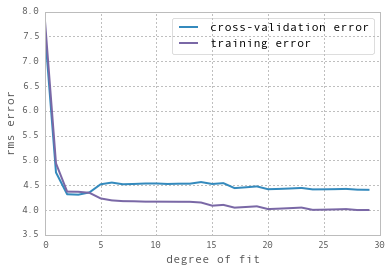

In [68]:
# suppress warnings from Polyfit
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

degrees = np.arange(30)
train_err = np.zeros(len(degrees))
validation_err = np.zeros(len(degrees))

for i, d in enumerate(degrees):
    p = np.polyfit(xtrain, ytrain, d)

    train_err[i] = rmse(xtrain, ytrain, p)
    validation_err[i] = rmse(xtest, ytest, p)

fig, ax = plt.subplots()

ax.plot(degrees, validation_err, lw=2, label = 'cross-validation error')
ax.plot(degrees, train_err, lw=2, label = 'training error')

ax.legend(loc=0)
ax.set_xlabel('degree of fit')
ax.set_ylabel('rms error')

In [69]:
np.argmin(validation_err)

3

In [70]:
def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_func(X.ravel(), error)
    
    return X, y

def test_func(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

In [71]:
from sklearn.linear_model import LinearRegression

class PolynomialRegression(LinearRegression):
    """Simple Polynomial Regression to 1D data"""
    def __init__(self, degree=1, **kwargs):
        self.degree = degree
        LinearRegression.__init__(self, **kwargs)
        
    def fit(self, X, y):
        if X.shape[1] != 1:
            raise ValueError("Only 1D data valid here")
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.fit(self, Xp, y)
        
    def predict(self, X):
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.predict(self, Xp)

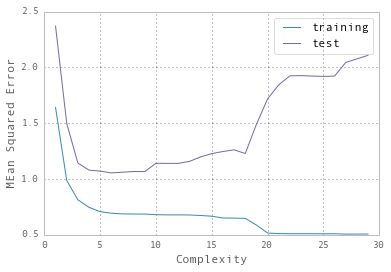

In [72]:
from sklearn import metrics

degrees = np.arange(1, 30)

X, y = make_data(100, error=1.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

training_error = []
test_error = []
mse = metrics.mean_squared_error

for d in degrees:
    model = PolynomialRegression(d).fit(X_train, y_train)
    training_error.append(mse(model.predict(X_train), y_train))
    test_error.append(mse(model.predict(X_test), y_test))
    
# note that the test error can also be computed via cross-validation
plt.plot(degrees, training_error, label='training')
plt.plot(degrees, test_error, label='test')
plt.legend()
plt.xlabel('Complexity')
plt.ylabel('MEan Squared Error');
plt.savefig("data_error.png", dpi=100)

<img src="http://www.kdnuggets.com/2012/09/bias-vs-variance.jpg" style="float:left; margin-right: 150px">

![bv](http://www.brnt.eu/phd/bias-variance.png)

In the cross-validation above, notice that the error is high for both very low and very high polynomial values, while training error declines monotonically with degree. The cross-validation error is composed of two components: **bias** and **variance**. When a model is underfit, bias is low but variance is high, while when a model is overfit, the reverse is true.

One can show that the MSE decomposes into a sum of the bias (squared) and variance of the estimator:

$$\begin{aligned}
\text{Var}(\hat{\theta}) &= E[\hat{\theta} - \theta]^2 - (E[\hat{\theta} - \theta])^2 \\
\Rightarrow E[\hat{\theta} - \theta]^2 &= \text{Var}(\hat{\theta}) + \text{Bias}(\hat{\theta})^2
\end{aligned}$$

The training error, on the other hand, does not have this tradeoff; it will always decrease (or at least, never increase) as variables (polynomial terms) are added to the model.

## Learning Curves

The exact turning-point of the tradeoff between bias and variance is highly dependent on the number of training points used.  Here we'll illustrate the use of *learning curves*, which display this property.

The idea is to plot the mean-squared-error for the training and test set as a function of *Number of Training Points*

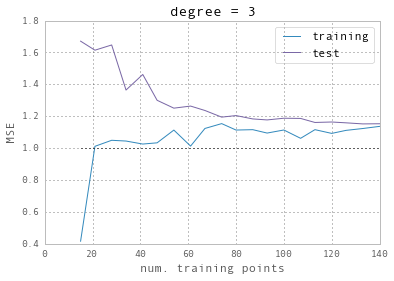

In [29]:
X, y = make_data(200, error=1.0)
degree = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

N_range = np.linspace(15, X_train.shape[0], 20).astype(int)

def plot_learning_curve(degree=3):
    training_error = []
    test_error = []
    mse = metrics.mean_squared_error
    
    for N in N_range:
        XN = X_train[:N]
        yN = y_train[:N]
    
        model = PolynomialRegression(degree).fit(XN, yN)
        training_error.append(mse(model.predict(XN), yN))
        test_error.append(mse(model.predict(X_test), y_test))
      
    plt.plot(N_range, training_error, label='training')
    plt.plot(N_range, test_error, label='test')
    plt.plot(N_range, np.ones_like(N_range), ':k')
    plt.legend()
    plt.title('degree = {0}'.format(degree))
    plt.xlabel('num. training points')
    plt.ylabel('MSE')
    
plot_learning_curve(3)

This shows a typical learning curve: for very few training points, there is a large separation between the training and test error, which indicates **over-fitting**.  Given the same model, for a large number of training points, the training and testing errors converge, which indicates potential **under-fitting**.

It is easy to see that, in this plot, if you'd like to reduce the MSE down to the nominal value of 1.0 (which is the magnitude of the scatter we put in when constructing the data), then adding more samples will *Never* get you there.  For $d=3$, we've already converged.  What about for $d=1$?

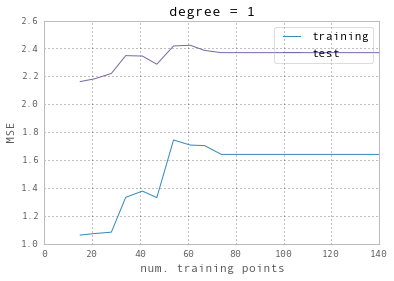

In [73]:
plot_learning_curve(1)

We see that it hasn't converged yet: you still might expect to decrease the test error by adding more points.

What about the other extreme?

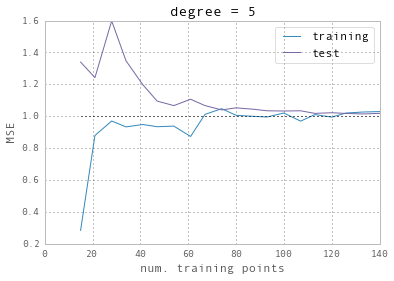

In [31]:
plot_learning_curve(5)

For $d=5$, it's converged, but to a better value than for $d=3$.

Thus you can **bring the two curves closer together** by adding more points, but you can **bring the convergence level down** only by adding complexity to the model.

This can be very useful, because it gives you a hint about how to improve upon results which are sub-par.  To make this more concrete, imagine an astronomy project in which the results are not robust enough.  You must think about whether to spend your valuable telescope time observing *more objects* to get a larger training set, or *more attributes of each object* in order to improve the model.  The answer to this question is important, and can be addressed using these metrics.

## K-fold Cross-validation

In **k-fold cross-validation**, the training set is split into *k* smaller sets. Then, for each of the k "folds":

1. trained model on *k-1* of the folds as training data
2. validate this model the remaining fold, using an appropriate metric

The performance measure reported by k-fold CV is then the average of the *k* computed values. This approach can be computationally expensive, but does not waste too much data, which is an advantage over having a fixed test subset.

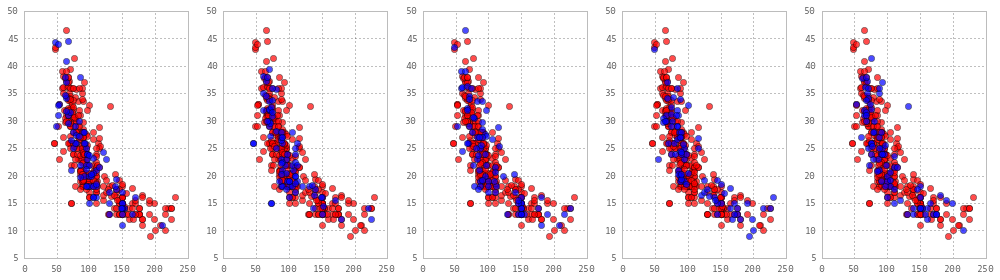

In [32]:
from sklearn.cross_validation import cross_val_score, KFold

nfolds = 5
fig, axes = plt.subplots(1, nfolds, figsize=(14,4))
for i, fold in enumerate(KFold(len(horses), n_folds=nfolds, 
                               shuffle=True)):
    training, validation = fold
    x, y = horses[training], mpg[training]
    axes[i].plot(x, y, 'ro', alpha=0.7)
    x, y = horses[validation], mpg[validation]
    axes[i].plot(x, y, 'bo', alpha=0.7)
plt.tight_layout()

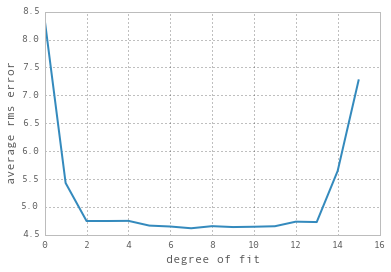

In [33]:
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

k = 5
degrees = np.arange(16)
k_fold_err = np.empty(len(degrees))

for i, d in enumerate(degrees):
    
    error = np.empty(k)
    
    #for j, fold in enumerate(gen_k_folds(salmon, k)):
    for j, fold in enumerate(KFold(len(horses), n_folds=k)):

        training, validation = fold
        
        x_train, y_train = horses[training], mpg[training]
   
        x_test, y_test = horses[validation], mpg[validation]
            
        p = np.polyfit(x_train, y_train, d)
        
        error[j] = rmse(x_test, y_test, p)

    k_fold_err[i] = error.mean()
        

fig, ax = plt.subplots()

ax.plot(degrees, k_fold_err, lw=2)
ax.set_xlabel('degree of fit')
ax.set_ylabel('average rms error')

In [34]:
np.argmin(k_fold_err)

7

If the model shows high **bias**, the following actions might help:

- **Add more features**. In our example of predicting home prices,
  it may be helpful to make use of information such as the neighborhood
  the house is in, the year the house was built, the size of the lot, etc.
  Adding these features to the training and test sets can improve
  a high-bias estimator
- **Use a more sophisticated model**. Adding complexity to the model can
  help improve on bias. For a polynomial fit, this can be accomplished
  by increasing the degree d. Each learning technique has its own
  methods of adding complexity.
- **Decrease regularization**. Regularization is a technique used to impose
  simplicity in some machine learning models, by adding a penalty term that
  depends on the characteristics of the parameters. If a model has high bias,
  decreasing the effect of regularization can lead to better results.
  
If the model shows **high variance**, the following actions might help:

- **Use fewer features**. Using a feature selection technique may be
  useful, and decrease the over-fitting of the estimator.
- **Use a simpler model**.  Model complexity and over-fitting go hand-in-hand.
- **Use more training samples**. Adding training samples can reduce
  the effect of over-fitting, and lead to improvements in a high
  variance estimator.
- **Increase regularization**. Regularization is designed to prevent
  over-fitting. In a high-variance model, increasing regularization
  can lead to better results.

## Regularization

We will be using a dataset of prostrate cancer occurances.

In [35]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
prostrate = pd.read_table("data/prostrate.data").iloc[:,1:]

In [36]:
prostrate.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [37]:
training = prostrate[prostrate.train=="T"]

In [38]:
testing = prostrate[prostrate.train=="F"]

In [39]:
len(testing)

30

In [40]:
len(training)

67

In [41]:
prostrate.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


Let's examine how a linear regression model performs across a range of sample sizes.

In [42]:
prostrate.iloc[:,:-2]

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
5,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0
7,0.693147,3.539509,58,1.536867,0,-1.386294,6,0
8,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0
9,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0


In [43]:
X_d = prostrate.iloc[:,:-2]
y_d = prostrate.iloc[:,-2]

ytrain, ytest = y_d[0:50], y_d[50:]
Xtrain, Xtest = X_d[0:50], X_d[50:]

The estimator for the ridge regression model is:

$$\hat{\beta}^{ridge} = (X'X + \alpha I)^{-1}X'y$$

In [44]:
def ridge(X, y, d2):
    return dot(dot(inv(dot(X.T, X) + d2*eye(X.shape[1])), X.T), y)

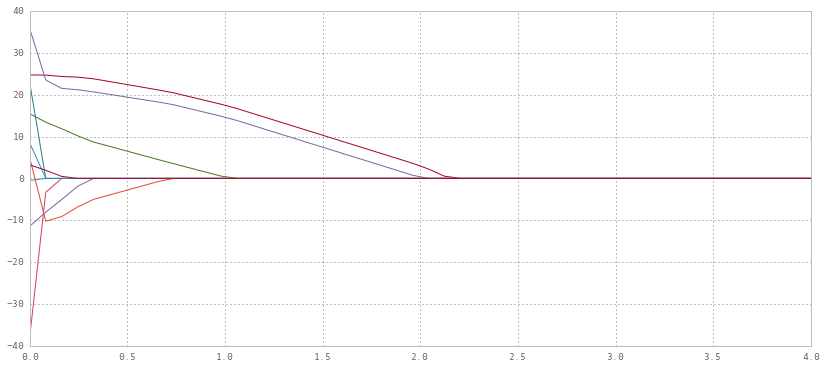

In [45]:
from sklearn import preprocessing
from sklearn import linear_model

k = diabetes['data'].shape[1]
alphas = np.linspace(0, 4)
params = np.zeros((len(alphas), k))
for i,a in enumerate(alphas):
    X = preprocessing.scale(diabetes['data'])
    y = diabetes['target']
    fit = linear_model.Lasso(alpha=a, normalize=True).fit(X, y)
    params[i] = fit.coef_

figure(figsize=(14,6))
for param in params.T:
    plt.plot(alphas, param)

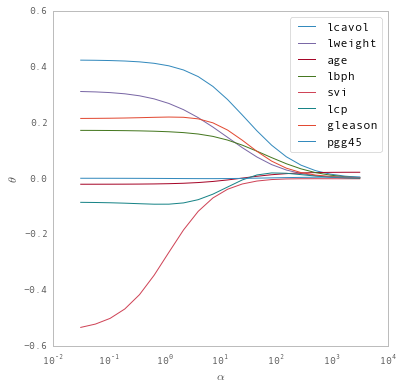

In [46]:
d2range = logspace(-1.5, 3.5, num=20)
thetas = array([ridge(Xtrain, ytrain, d2) for d2 in d2range])
figure(figsize=(6,6))
xscale('log')
grid()
xlabel(r'$\alpha$'); ylabel(r'$\theta$')
plot(d2range, thetas)
legend(prostrate.columns)
show()

In [47]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()